# Import Libraries

In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns',14)

# Loading and Inspecting the Data

In [435]:
# Load the Marvel dataset from the provided CSV file
df = pd.read_csv(r"D:\Prepinsta Internship Batch 3\4. Week 4 - Data Visualisation\Comic Book Character\marvel-wikia-data.csv")

In [437]:
# Display the first few rows of the dataset to inspect the data visually
df.head(10)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
5,2458,Benjamin Grimm (Earth-616),\/Benjamin_Grimm_(Earth-616),Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,NaN,Living Characters,2255.0,Nov-61,1961.0
6,2166,Reed Richards (Earth-616),\/Reed_Richards_(Earth-616),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2072.0,Nov-61,1961.0
7,1833,Hulk (Robert Bruce Banner),\/Hulk_(Robert_Bruce_Banner),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2017.0,May-62,1962.0
8,29481,Scott Summers (Earth-616),\/Scott_Summers_(Earth-616),Public Identity,Neutral Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1955.0,Sep-63,1963.0
9,1837,Jonathan Storm (Earth-616),\/Jonathan_Storm_(Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1934.0,Nov-61,1961.0


In [439]:
df.shape

(16376, 13)

In [441]:
# Get an overview of the dataset structure (number of rows, columns, data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


# Data Cleaning
## Handling Missing Values

In [444]:
# Check for missing values in each column
df.isna().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [446]:
# Optionally, drop rows where important columns (e.g., 'name', 'ALIGN') are missing
# For columns with less critical missing values, you can fill them with placeholders like 'Unknown'
df['ALIGN'].fillna('Unknown', inplace=True)
df['EYE'].fillna('Unknown', inplace=True)
df['HAIR'].fillna('Unknown', inplace=True)
df['SEX'].fillna('Unknown', inplace=True)

C:\Users\suriy\AppData\Local\Temp\ipykernel_33624\52910987.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ALIGN'].fillna('Unknown', inplace=True)
C:\Users\suriy\AppData\Local\Temp\ipykernel_33624\52910987.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [448]:
# For numeric columns with missing values (e.g., 'APPEARANCES'), fill with median or mean
df['APPEARANCES'].fillna(df['APPEARANCES'].median(), inplace = True)

C:\Users\suriy\AppData\Local\Temp\ipykernel_33624\249461110.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['APPEARANCES'].fillna(df['APPEARANCES'].median(), inplace = True)


In [450]:
print(df['ALIGN'].tail())

16371        Bad Characters
16372       Good Characters
16373        Bad Characters
16374    Neutral Characters
16375        Bad Characters
Name: ALIGN, dtype: object


In [452]:
df.isna().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                   0
EYE                     0
HAIR                    0
SEX                     0
GSM                 16286
ALIVE                   3
APPEARANCES             0
FIRST APPEARANCE      815
Year                  815
dtype: int64

# Feature Understanding

## Summary Statistics and Basic Visualizations

In [456]:
df.describe()

,page_id,APPEARANCES,Year
count,16376.000000,16376.000000,15561.000000
mean,300232.082377,16.094162,1984.951803
std,253460.403399,93.157959,19.663571
min,1025.000000,1.000000,1939.000000
25%,28309.500000,1.000000,1974.000000
50%,282578.000000,3.000000,1990.000000
75%,509077.000000,7.000000,2000.000000
max,755278.000000,4043.000000,2013.000000


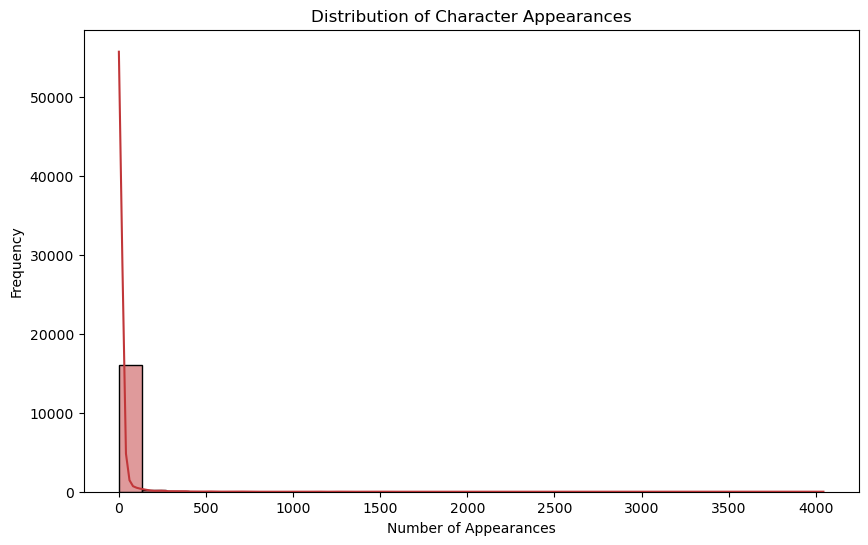

In [458]:
plt.figure(figsize=(10, 6))
dist = sns.histplot(df['APPEARANCES'], bins=30, kde=True)
plt.title('Distribution of Character Appearances')
plt.xlabel('Number of Appearances')
plt.ylabel('Frequency')
plt.show()

In [459]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [462]:
df.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

## Exploring Character Popularity

In [465]:
top_characters = df[['APPEARANCES','name']] \
                .sort_values(by = 'APPEARANCES', ascending=False).head(10)

APPEARANCES    float64
name            object
dtype: object


C:\Users\suriy\AppData\Local\Temp\ipykernel_33624\4008862129.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='APPEARANCES', y='name', data=top_characters, palette='RdYlBu')


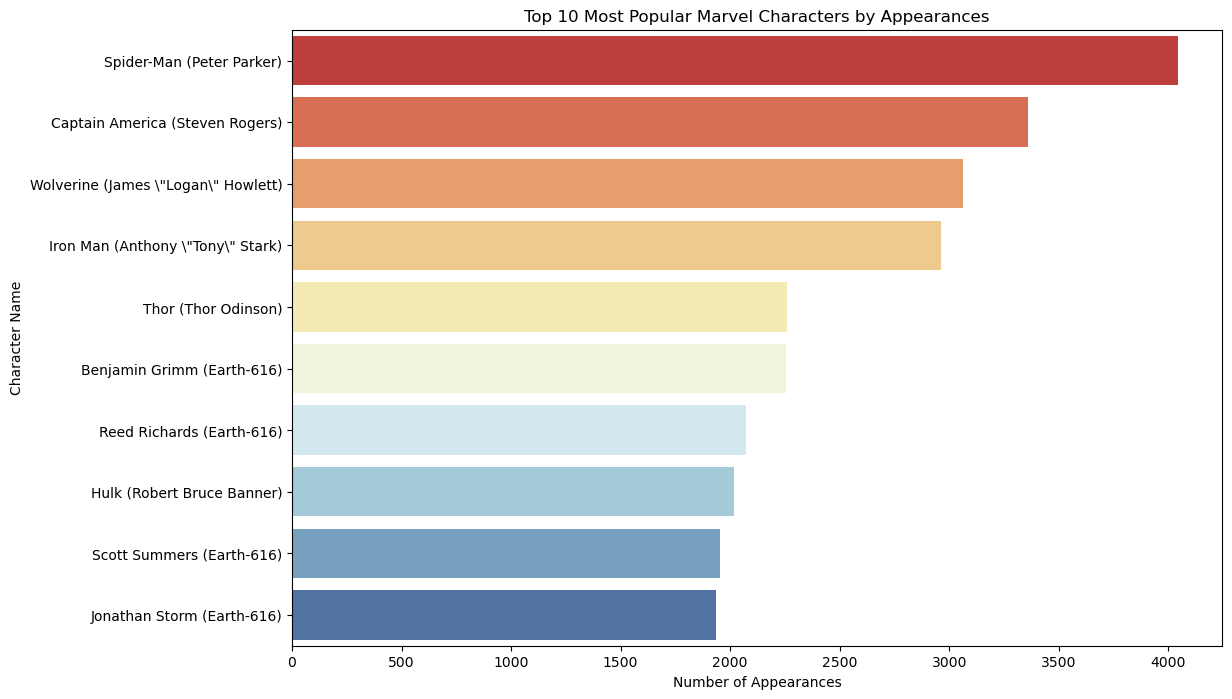

In [467]:
# Check if 'APPEARANCES' and 'name' columns exist and are properly typed
print(top_characters.dtypes)  # This will tell us if the columns are numeric and strings

# Just to make sure, explicitly convert 'APPEARANCES' to numeric and 'name' to string
top_characters['APPEARANCES'] = pd.to_numeric(top_characters['APPEARANCES'], errors='coerce')
top_characters['name'] = top_characters['name'].astype(str)

# Re-attempt the plotting
plt.figure(figsize=(12, 8))

# Plot bar chart
sns.barplot(x='APPEARANCES', y='name', data=top_characters, palette='RdYlBu')

plt.title('Top 10 Most Popular Marvel Characters by Appearances')
plt.xlabel('Number of Appearances')
plt.ylabel('Character Name')
plt.show()


## Character Alignment Analysis

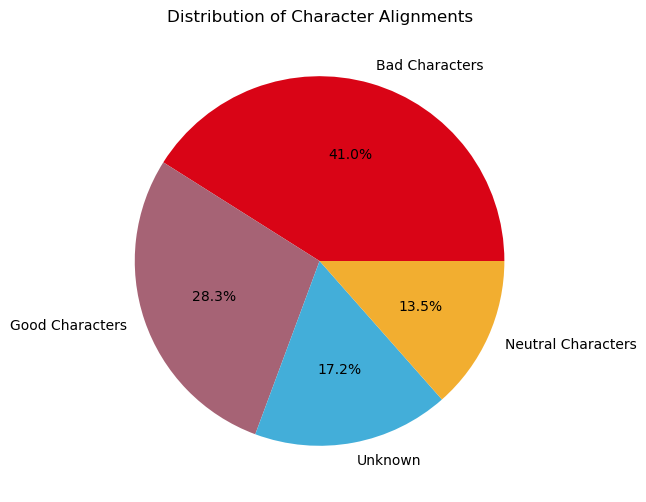

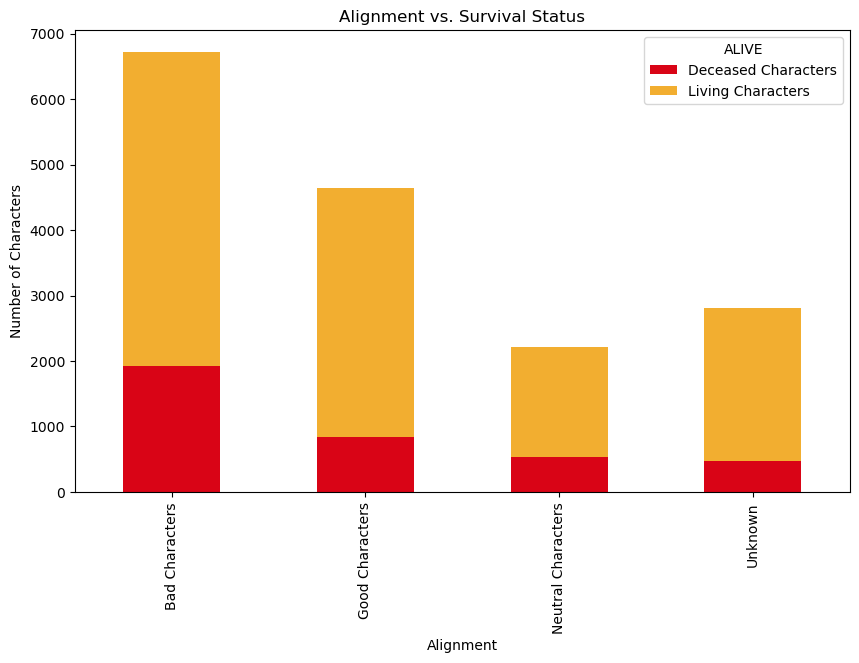

In [470]:
# Analyze the distribution of characters by their alignment (Good, Bad, Neutral)
alignment_distribution = df['ALIGN'].value_counts()

# Plot a pie chart or bar chart for the alignment distribution
plt.figure(figsize=(8, 6))
alignment_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['#D90416','#A66375', '#43AED9', '#F2AE30'])
plt.title('Distribution of Character Alignments')
plt.ylabel('')  # Remove y-label for cleaner visualization
plt.show()

# Analyze the relationship between alignment and survival status ('ALIVE')
alignment_alive = pd.crosstab(df['ALIGN'], df['ALIVE'])

# Plot a stacked bar chart for alignment vs. survival status
alignment_alive.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#D90416', '#F2AE30'])
plt.title('Alignment vs. Survival Status')
plt.xlabel('Alignment')
plt.ylabel('Number of Characters')
plt.show()


## Character Gender Distribution

C:\Users\suriy\AppData\Local\Temp\ipykernel_33624\3662864817.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette='RdYlBu')


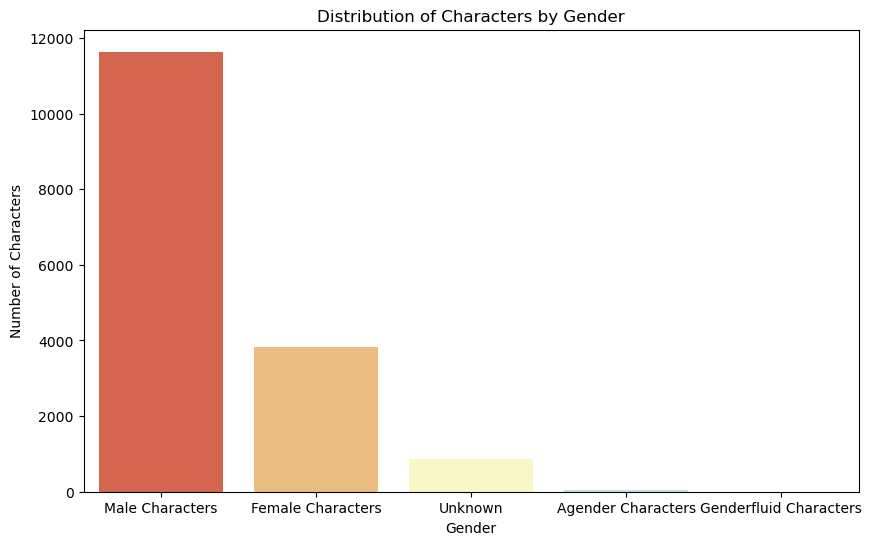

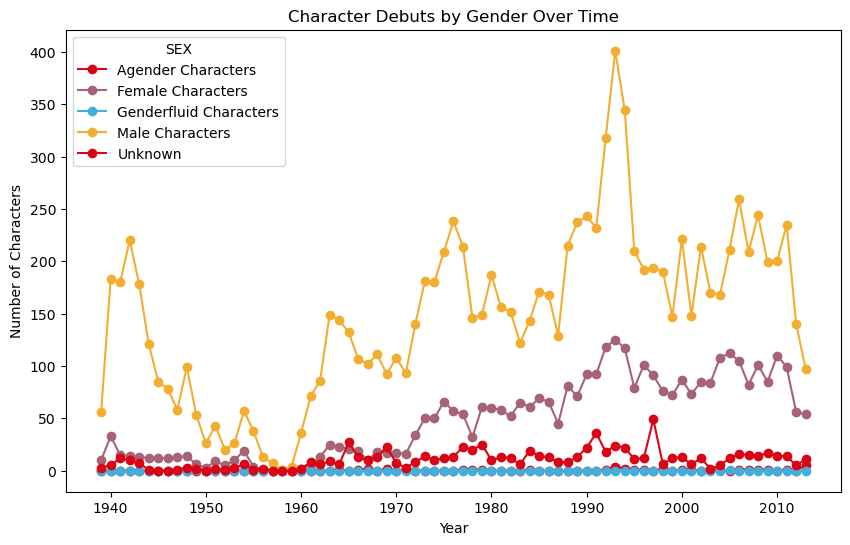

In [473]:
# Investigate the distribution of characters by gender (SEX)
gender_distribution = df['SEX'].value_counts()

# Plot a bar chart for gender distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette='RdYlBu')
plt.title('Distribution of Characters by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Characters')
plt.show()

# Investigate how the gender distribution has evolved over time
# Plot the number of male/female character debuts by year
gender_year = pd.crosstab(df['Year'], df['SEX'])

# Plot a line graph to show gender trends over the years
gender_year.plot(kind='line', figsize=(10, 6), marker='o', color=['#D90416','#A66375', '#43AED9', '#F2AE30'])
plt.title('Character Debuts by Gender Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Characters')
plt.show()


## Character Debuts by Year

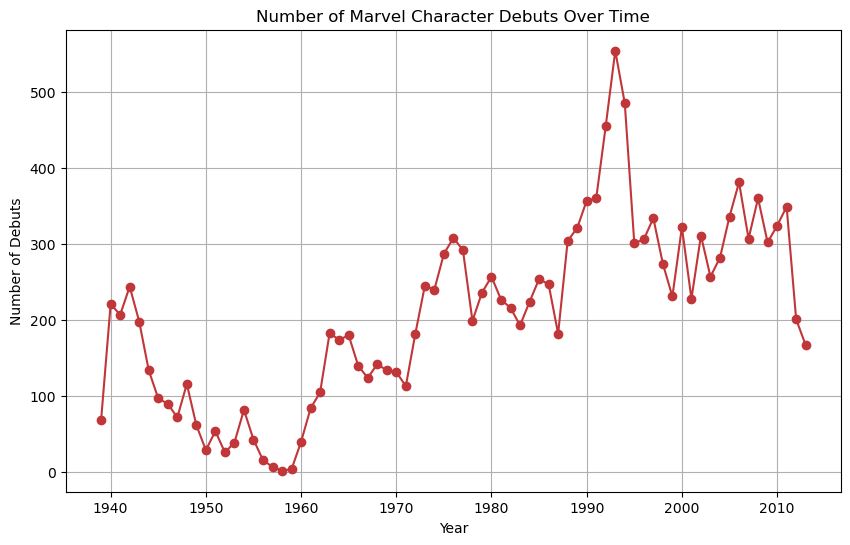

C:\Users\suriy\AppData\Local\Temp\ipykernel_33624\3739259827.py:17: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  alignment_year.plot(kind='area', stacked=True, figsize=(10, 6), cmap='Set2', color=['#D90416','#A66375', '#43AED9', '#F2AE30'])
C:\Users\suriy\AppData\Local\Temp\ipykernel_33624\3739259827.py:17: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  alignment_year.plot(kind='area', stacked=True, figsize=(10, 6), cmap='Set2', color=['#D90416','#A66375', '#43AED9', '#F2AE30'])


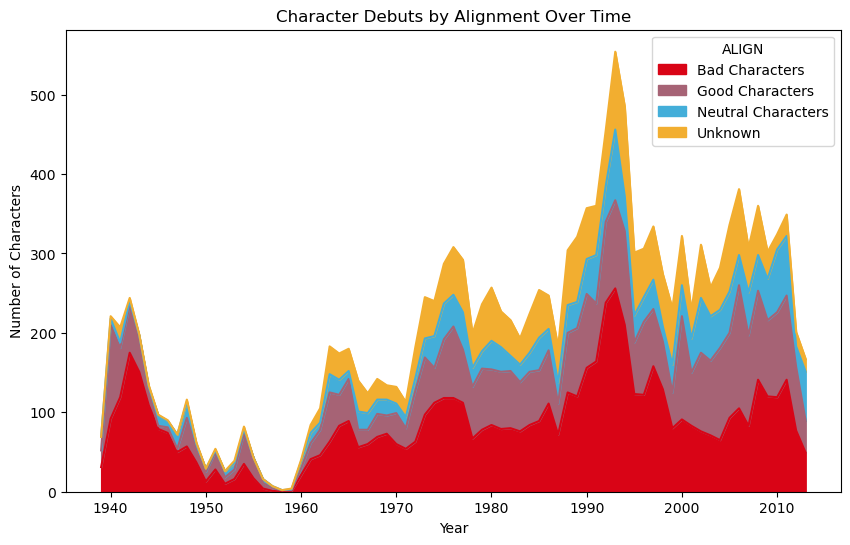

In [475]:
# Analyze the number of character debuts by year
character_debuts = df['Year'].value_counts().sort_index()

# Plot a line chart to show character debuts over time
plt.figure(figsize=(10, 6))
plt.plot(character_debuts.index, character_debuts.values, marker='o')
plt.title('Number of Marvel Character Debuts Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Debuts')
plt.grid(True)
plt.show()

# Compare the debuts of Good, Bad, and Neutral characters by year
alignment_year = pd.crosstab(df['Year'], df['ALIGN'])

# Plot a stacked area chart to show debuts by alignment over time
alignment_year.plot(kind='area', stacked=True, figsize=(10, 6), cmap='Set2', color=['#D90416','#A66375', '#43AED9', '#F2AE30'])
plt.title('Character Debuts by Alignment Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Characters')
plt.show()


# Feature Relationship

## Dive Deeper into Correlations

### Character Traits vs. Popularity:

#### Investigate correlations between character traits (e.g., EYE, HAIR, SEX) and the number of comic appearances. Are characters with certain traits more popular?

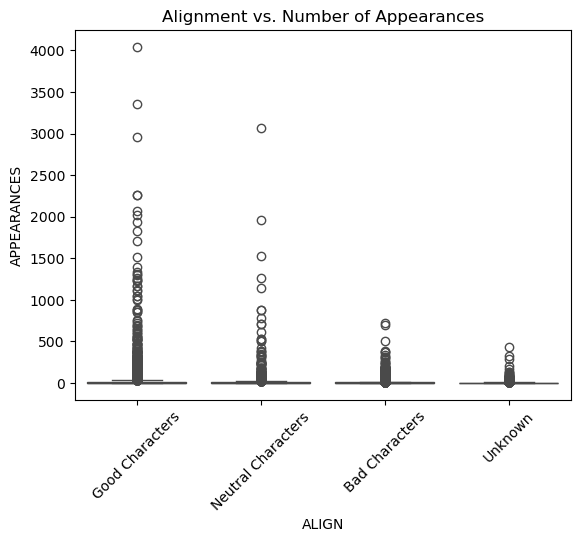

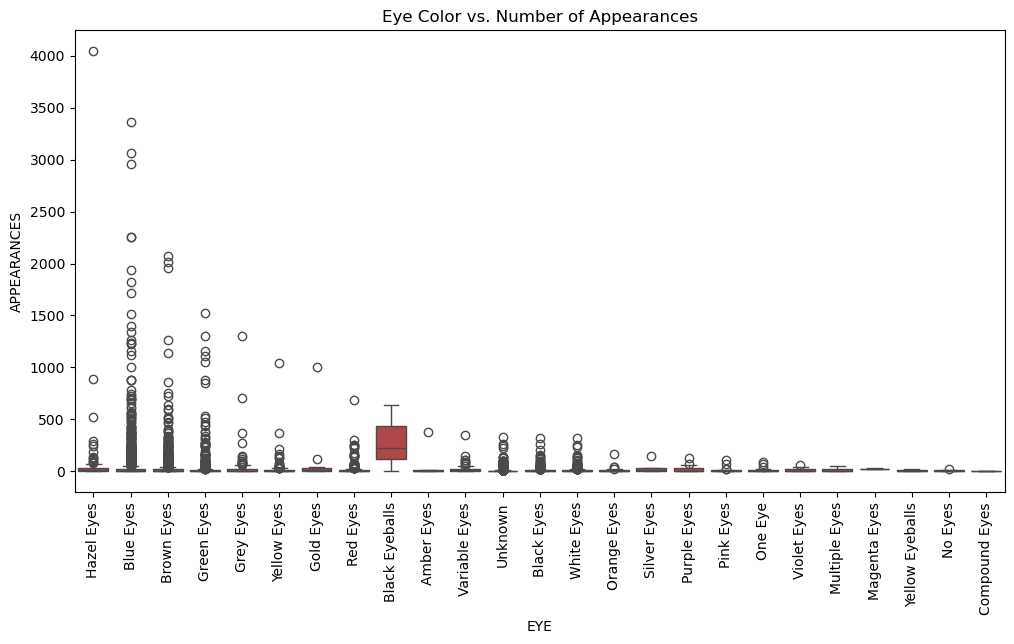

In [481]:
# Analyze correlation between 'APPEARANCES' and categorical variables
sns.boxplot(x='ALIGN', y='APPEARANCES', data=df)
plt.title('Alignment vs. Number of Appearances')
plt.xticks(rotation=45) 
plt.show()

# Similar analysis for 'EYE' and 'HAIR' characteristics
plt.figure(figsize=(12, 6))
sns.boxplot(x='EYE', y='APPEARANCES', data=df)
plt.title('Eye Color vs. Number of Appearances')
plt.xticks(rotation=90) 
plt.show()


### Survival Status and Popularity:

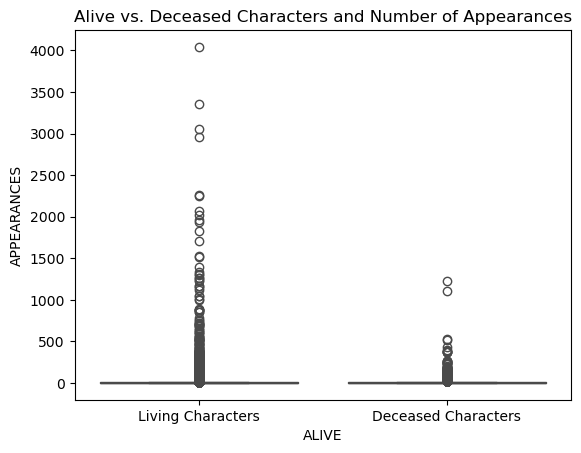

In [483]:
sns.boxplot(x='ALIVE', y='APPEARANCES', data=df)
plt.title('Alive vs. Deceased Characters and Number of Appearances')
plt.show()


## Filtering Data by Time Periods:
### Era-Specific Trends:

#### Filter characters by decades or specific time periods to see if certain trends (like character traits, popularity, or alignment) vary across different eras.

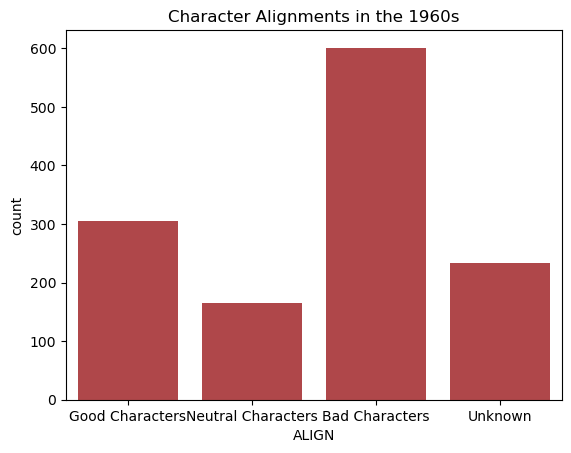

In [487]:
# Filter data by a specific time period, like the 1960s
characters_60s = df[(df['Year'] >= 1960) & (df['Year'] < 1970)]

# Analyze character traits in the 1960s
sns.countplot(x='ALIGN', data=characters_60s)
plt.title('Character Alignments in the 1960s')
plt.show()

# Repeat similar analysis for different periods (e.g., 1940s, 1980s, etc.)


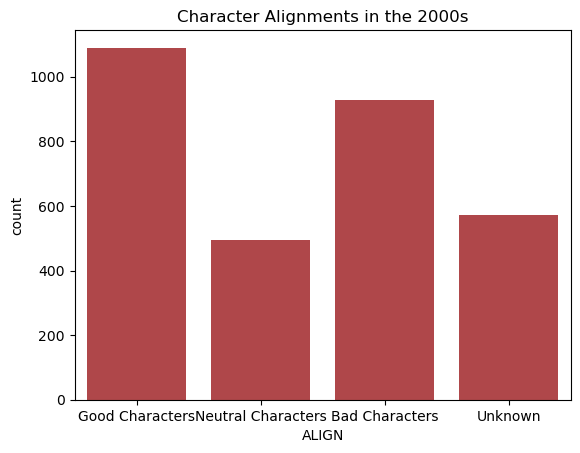

In [489]:
# Filter data by a specific time period, like the 1960s
characters_20s = df[(df['Year'] >= 2000) & (df['Year'] < 2010)]

# Analyze character traits in the 1960s
sns.countplot(x='ALIGN', data=characters_20s)
plt.title('Character Alignments in the 2000s')
plt.show()

## Focus on Specific Character Traits:
### Gender Representation Over Time:

#### Investigate how gender representation has evolved across different decades, analyzing if the introduction of female characters increased over time.

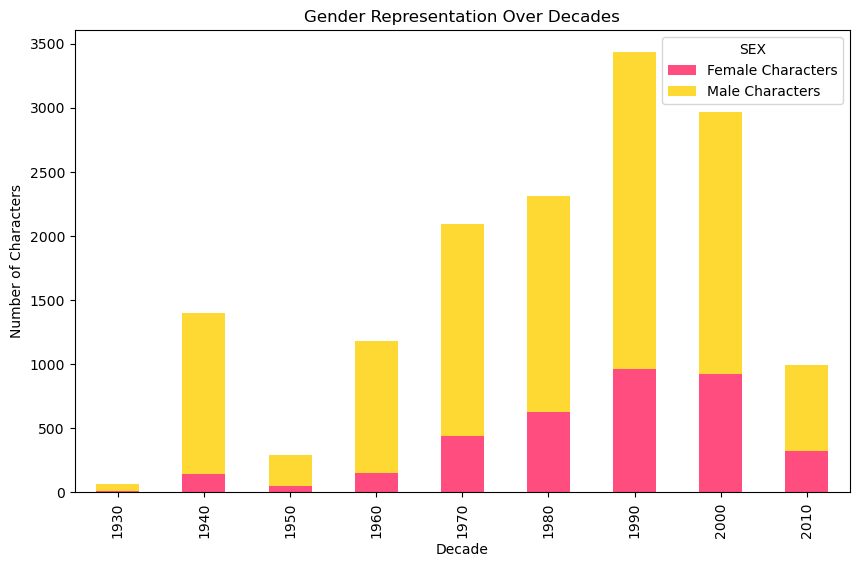

In [508]:
# Handle missing or non-finite values in the 'Year' column
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert to numeric, set invalid values to NaN
df = df.dropna(subset=['Year'])  # Drop rows with NaN values in 'Year'

# Convert 'Year' to integers after handling NaN values
df['Year'] = df['Year'].astype(int)

# Define the four desired categories (modify as needed)
categories = ['Female Characters', 'Male Characters', 'Agender Character']

# Filter data to include only desired categories
data_filtered = df[df['SEX'].isin(categories)]

# Gender distribution over decades
gender_decade = pd.crosstab(df['Year'] // 10 * 10, data_filtered['SEX'])

# Plot a stacked bar chart for gender distribution over decades
gender_decade.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF4D80','#FFD933'])
plt.title('Gender Representation Over Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Characters')
plt.show()
